<a href="https://colab.research.google.com/github/Todimu-sama/Well_of_knowledge/blob/master/Implementing_a_CART_algorithm_on_sample_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
The following code is used to implement the CART algorithm in a binary classification problem
using the Titanic dataset as a sample data. The aim of this project is to predict who survives and who
does not with a value of 1 being "yes" and 0 being "no".
'''

'\nThe following code is used to implement the CART algorithm in a binary classification problem\nusing the Titanic dataset as a sample data. The aim of this project is to predict who survives and who\ndoes not with a value of 1 being "yes" and 0 being "no".\n'

In [2]:
# First we import data handling libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Next we import data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# We then import the Decision tree algorithm from the sklearn libraries
from sklearn.tree import  DecisionTreeRegressor

# import model evaluation metrics
from sklearn.model_selection import cross_val_score

In [3]:
# Now let us import our data into the code
from google.colab import files
import io

uploaded = files.upload()

Saving train_clean.csv to train_clean.csv


In [4]:
tit_tr = pd.read_csv(io.BytesIO(uploaded['train_clean.csv']))

In [5]:
Uploaded = files.upload()

Saving test_clean.csv to test_clean.csv


In [7]:
tit_te = pd.read_csv(io.BytesIO(Uploaded['test_clean.csv']))

In [8]:
tit_tr.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [9]:
tit_te.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [11]:
# some exploratory dat a analysis
print('{0} rows in training set'.format(tit_tr.shape[0]))
print(tit_tr['Survived'].value_counts())
print('{0} people survived while {1} people died in the titanic training dataset'.format(342, 549))

891 rows in training set
0.0    549
1.0    342
Name: Survived, dtype: int64
342 people survived while 549 people died in the titanic training dataset


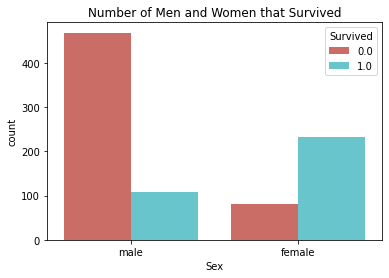

In [14]:
sns.countplot(x='Sex', data=tit_tr, palette='hls', hue='Survived')
plt.title('Number of Men and Women that Survived')
plt.show()

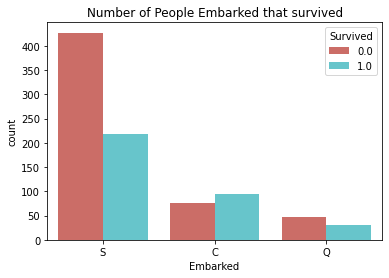

In [15]:
sns.countplot(x='Embarked', data=tit_tr, palette='hls', hue='Survived')
plt.title('Number of People Embarked that survived')
plt.show()

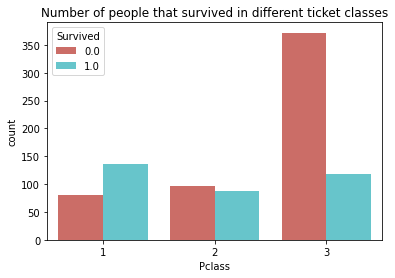

In [16]:
sns.countplot(x='Pclass', data=tit_tr, palette='hls', hue='Survived')
plt.title('Number of people that survived in different ticket classes')
plt.show()

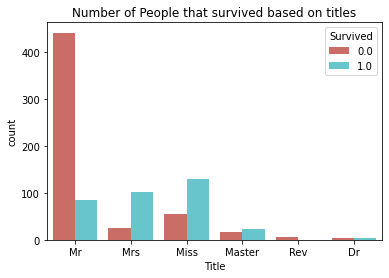

In [18]:
sns.countplot(x='Title', data=tit_tr, palette='hls', hue='Survived')
plt.title('Number of People that survived based on titles')
plt.show()

In [20]:
# machine learning algorithms cannot take in string and words as inputs, only numbers
# hence we must find a way to convert categorical variables into number form. We do this
# by one hot encoding. We will do this for the Title, Embarked and Sex columns in the data set

In [21]:
# pre processing the data

# for sex
tit_tr['Sex'] =  tit_tr['Sex'].astype('category')
tit_tr['Sex'] = tit_tr['Sex'].cat.codes

# for embarked and title columns
cat = ['Embarked', 'Title']

for var in cat:
    tit_tr = pd.concat([tit_tr, pd.get_dummies(tit_tr[var], prefix=var)], axis=1)
    del tit_tr[var]

# Dropping unnecessary columns 
tit_tr = tit_tr.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [23]:
# Next stage in the implementation stage is to split the training data into training and validation sets
# This is done using the train test split module

target = 'Survived'
X = np.array(tit_tr.drop([target], 1))
y = np.array(tit_tr[target])

# random state parameter ensures that the data is split using the same initial splitting conditions anytime 
# we rerun the code
X_train, X_value, y_train, y_value = train_test_split(X, y, test_size=0.2, random_state=5)

In [29]:
# now we call the machine learning model, the tree classifier and train the model

# training the model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# making predictions in order to test accuracy of the model
b = tree.predict(X_value)
b = b.astype('int')

In [25]:
# import model evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
print('Decision Tree Accuracy : ',accuracy_score(y_value, b))

Decision Tree Accuracy :  0.8324022346368715


In [32]:
# The model has an 83 percent accuracy on the validation set.
# Next we implement the model on the test set

In [33]:
# preprocessing the test data 
tit_te['Sex'] =  tit_te['Sex'].astype('category')
tit_te['Sex'] = tit_te['Sex'].cat.codes

cat = ['Embarked', 'Title']

for var in cat:
    tit_te = pd.concat([tit_te, pd.get_dummies(tit_te[var], prefix=var)], axis=1)
    del tit_te[var]
    
tit_te = tit_te.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [36]:
# train test split
target = 'Survived'
X = np.array(tit_te.drop([target], 1))

In [37]:
yhat_tree = tree.predict(X).astype('int')

In [38]:
tit_te['Survived'] = yhat_tree
tit_te.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,34.5,7.8292,0,3,1,0,0,0,0,1,0,0,0,0,1,0,0
1,47.0,7.0000,0,3,0,1,1,1,0,0,1,0,0,0,0,1,0
2,62.0,9.6875,0,2,1,0,1,0,0,1,0,0,0,0,1,0,0
3,27.0,8.6625,0,3,1,0,1,0,0,0,1,0,0,0,1,0,0
4,22.0,12.2875,1,3,0,1,0,2,0,0,1,0,0,0,0,1,0


In [41]:
tit_te['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# Next we save the model
